In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the dependency requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | dibrugarh
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | fairbanks
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | bogovarovo
Processing Record 8 of Set 1 | shelburne
Processing Record 9 of Set 1 | kabinda
Processing Record 10 of Set 1 | khash
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | caluquembe
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | chapleau
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | kathu
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | sur
Processing Re

Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | itoman
Processing Record 43 of Set 4 | cootamundra
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | kupang
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | xiuyan
Processing Record 49 of Set 4 | saint-augustin
Processing Record 50 of Set 4 | haines junction
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | saint-georges
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | karratha
Processing Record 5 of Set 5 | floro
Processing Record 6 of Set 5 | busselton
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | dolores
Processing Record 9 of Set 5 | kodiak
Processing Record 10 of Set 5 | dzhusaly
City not found. Skipping...
Processing Record 11 of Set 5 | hauterive
Processing Record 12 of Set 5 | bereda
Processing Record 13 of Set 5 | 

Processing Record 33 of Set 8 | luanda
Processing Record 34 of Set 8 | lobito
Processing Record 35 of Set 8 | inzhavino
Processing Record 36 of Set 8 | pimentel
Processing Record 37 of Set 8 | komsomolskiy
Processing Record 38 of Set 8 | palmas bellas
Processing Record 39 of Set 8 | san fernando
Processing Record 40 of Set 8 | ciudad bolivar
Processing Record 41 of Set 8 | huarmey
Processing Record 42 of Set 8 | bira
Processing Record 43 of Set 8 | alyangula
Processing Record 44 of Set 8 | sibolga
Processing Record 45 of Set 8 | waingapu
Processing Record 46 of Set 8 | korla
Processing Record 47 of Set 8 | tuatapere
Processing Record 48 of Set 8 | bilma
Processing Record 49 of Set 8 | fort nelson
Processing Record 50 of Set 8 | saint anthony
Processing Record 1 of Set 9 | shenjiamen
Processing Record 2 of Set 9 | mangrol
Processing Record 3 of Set 9 | mastic beach
Processing Record 4 of Set 9 | agirish
Processing Record 5 of Set 9 | vila franca do campo
Processing Record 6 of Set 9 | b

Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | tuscaloosa
Processing Record 26 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 27 of Set 12 | calabozo
Processing Record 28 of Set 12 | te anau
Processing Record 29 of Set 12 | pundaguitan
Processing Record 30 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 12 | palana
Processing Record 32 of Set 12 | sitka
Processing Record 33 of Set 12 | aripuana
Processing Record 34 of Set 12 | choix
Processing Record 35 of Set 12 | lufilufi
Processing Record 36 of Set 12 | hanover
Processing Record 37 of Set 12 | port macquarie
Processing Record 38 of Set 12 | oum hadjer
Processing Record 39 of Set 12 | mani
Processing Record 40 of Set 12 | port moresby
Processing Record 41 of Set 12 | chara
Processing Record 42 of Set 12 | mocambique
City not found. Skipping...
Processing Record 43 of Set 12 | ziarat
Processing Record 44 of Set 12 | cairns
Processing Record 45 of Set 12 

In [10]:
# Tally the number of cities.
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Isangel,-19.5500,169.2667,75.31,60,75,18.41,VU,2021-07-30 21:36:14
1,Dibrugarh,27.4833,94.9000,76.26,92,98,0.94,IN,2021-07-30 21:36:15
2,Imbituba,-28.2400,-48.6703,53.49,78,0,2.28,BR,2021-07-30 21:36:15
3,Fairbanks,64.8378,-147.7164,68.34,65,90,4.61,US,2021-07-30 21:36:37
4,Esperance,-33.8667,121.9000,40.84,85,68,11.59,AU,2021-07-30 21:36:37


In [12]:
# Reorder the columns so they are easier to read. 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,2021-07-30 21:36:14,-19.5500,169.2667,75.31,60,75,18.41
1,Dibrugarh,IN,2021-07-30 21:36:15,27.4833,94.9000,76.26,92,98,0.94
2,Imbituba,BR,2021-07-30 21:36:15,-28.2400,-48.6703,53.49,78,0,2.28
3,Fairbanks,US,2021-07-30 21:36:37,64.8378,-147.7164,68.34,65,90,4.61
4,Esperance,AU,2021-07-30 21:36:37,-33.8667,121.9000,40.84,85,68,11.59


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

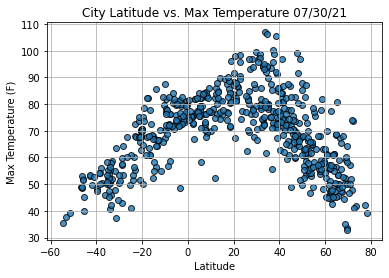

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

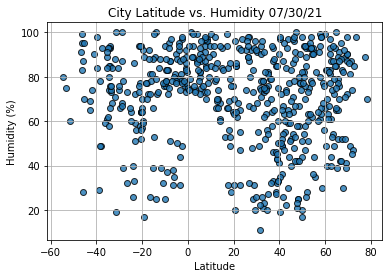

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

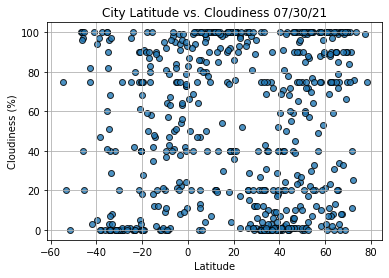

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

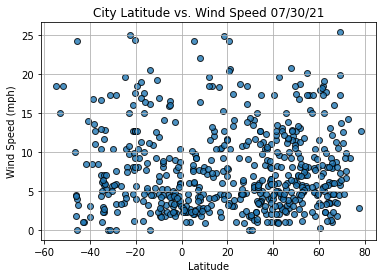

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()